<a href="https://colab.research.google.com/github/XavierCarrera/platzi-master-ml-exercises/blob/main/Uber_DataAnalysis_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Problem Definition

[EN]

For this challenge, we're going to perform a business analysis with visualization based on Uber's pickup services in New York. Likewise, we'll use storytelling to discover what data can tell us.

We're going to answer three questions:
1. What are the time lapses with more Uber rides?
2. What are the Uber bases that dispatch more rides?
3. From which zones in New York there are more rides?

The original challenge and dataset can be found here:

https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city

[ES]

Para este reto, vamos a realizar un análisis de negocio con visualización de datos basado en los servicios de recogida de Uber en Nueva York. Así mismo, utilizaremos  storytelling para descubrir que nos dicen los datos.

Vamos a responder tres preguntas:
1. ¿Cuales son los lapsos de tiempo con más viajes de Uber?
2. ¿Que centrales de Uber envían más viajes?
3. ¿De que zonas de Nueva York hay más viajes?

El reto y dataset originales los podemos encontrar aquí: 

https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city

[EN]

Note: The Basemap module is not previously installed in Google Colab. Thus, we need to install it beforehand with the following code.

[ES]

Nota: El módulo Basemap no esta previamente instalado en Google Colab. Por ello, necesitamos instalarlo de antemano con el siguiente código.

In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
april = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/uber/uber-raw-data-apr14.csv")
may = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/uber/uber-raw-data-may14.csv")
june = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/uber/uber-raw-data-jun14.csv")
july = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/uber/uber-raw-data-jul14.csv")
august = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/uber/uber-raw-data-aug14.csv")
september = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/uber/uber-raw-data-sep14.csv")

In [3]:
april.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Data Wrangling

[EN]

In order to have consistent data, we're going to follow the next steps:

1. Concatenate all the CSVs into a single dataframe.
2. Transform the Date/Time column into three distinct ones: month, weekday and hour. It's important to pay attention to use the to_datetime modules in order to allocate the proper format of each column.
3. Replace the base code with the actual base name.
4. Check for any null value.

[ES]

Para tener datos consistentes, vamos a seguir los siguientes pasos:

1. Concatenar todos los CSVs en un solo dataframe.
2. Transformar la columna Date/time en tres distintas: mes, día de la semana y hora. Es importante prestar atención al uso de los módulos de to_datetime para asignar el formato apropiado en cada columna.
3. Remplazar el código de cada base pur su nombre real.
4. Mirar si hay datos nulos. 

In [73]:
df = pd.concat([april, may, june, july, august, september])

In [ ]:
df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [75]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%m/%d/%Y %H:%M:%S")
df["Month"] = df["Date/Time"].dt.month
df["Month"].replace({4:"4.April", 5:"5.May", 6:"6.June",7:"7.July", 8:"8.August", 9:"9.September"}, inplace=True)
df["Weekday"] = df["Date/Time"].dt.dayofweek
df["Weekday"].replace({0:"1.Monday", 1:"2.Tuesday", 2:"3.Wednesday",3:"4.Thursday", 4:"5.Friday", 5:"6.Saturday", 6:"7.Sunday"}, inplace=True)
df["Hour"] = df["Date/Time"].dt.hour
df.drop(["Date/Time"], axis=1, inplace=True)
df

,Lat,Lon,Base,Month,Weekday,Hour
0,40.7690,-73.9549,B02512,4.April,2.Tuesday,0
1,40.7267,-74.0345,B02512,4.April,2.Tuesday,0
2,40.7316,-73.9873,B02512,4.April,2.Tuesday,0
3,40.7588,-73.9776,B02512,4.April,2.Tuesday,0
4,40.7594,-73.9722,B02512,4.April,2.Tuesday,0
...,...,...,...,...,...,...
1028131,40.7668,-73.9845,B02764,9.September,2.Tuesday,22
1028132,40.6911,-74.1773,B02764,9.September,2.Tuesday,22
1028133,40.8519,-73.9319,B02764,9.September,2.Tuesday,22
1028134,40.7081,-74.0066,B02764,9.September,2.Tuesday,22


In [76]:
df["Base"].replace({"B02512":"Unter","B02598":"Hinter","B02617":"Weiter","B02682":"Schmecken",
                    "B02764":"Danach-NY","B02765":"Grun","B02835":"Dreist","B02836":"Drinnen"}, inplace=True)
df

,Lat,Lon,Base,Month,Weekday,Hour
0,40.7690,-73.9549,Unter,4.April,2.Tuesday,0
1,40.7267,-74.0345,Unter,4.April,2.Tuesday,0
2,40.7316,-73.9873,Unter,4.April,2.Tuesday,0
3,40.7588,-73.9776,Unter,4.April,2.Tuesday,0
4,40.7594,-73.9722,Unter,4.April,2.Tuesday,0
...,...,...,...,...,...,...
1028131,40.7668,-73.9845,Danach-NY,9.September,2.Tuesday,22
1028132,40.6911,-74.1773,Danach-NY,9.September,2.Tuesday,22
1028133,40.8519,-73.9319,Danach-NY,9.September,2.Tuesday,22
1028134,40.7081,-74.0066,Danach-NY,9.September,2.Tuesday,22


In [77]:
df.isnull().sum().sum()

0

# Data Visualization

[EN]

First, we want to check what are the time frame in which there are more Uber Rides. 

[ES] 

Primero, queremos mirar cuales son los periodos de tiempo en los que hay más viajes de Uber.

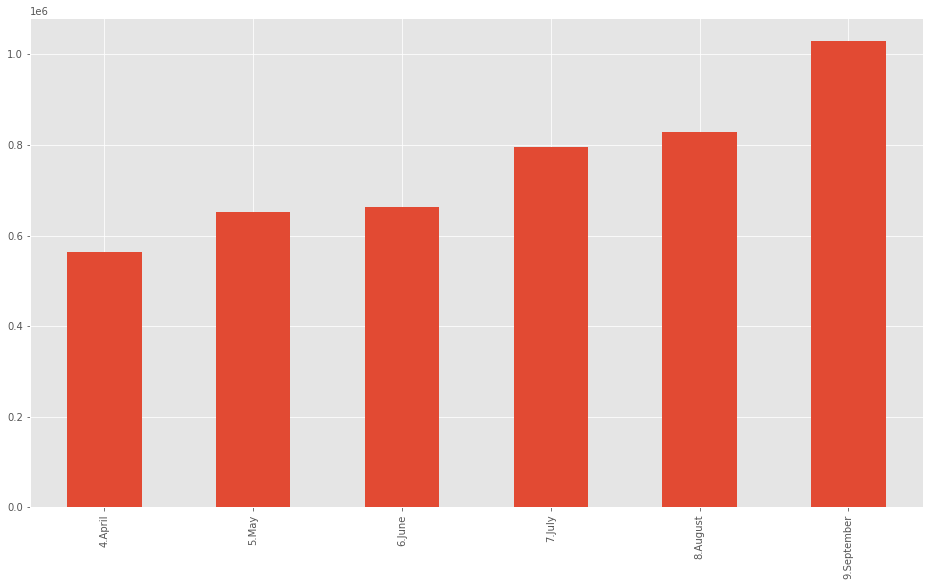

In [78]:
df["Month"].value_counts().sort_index().plot(kind = "bar")

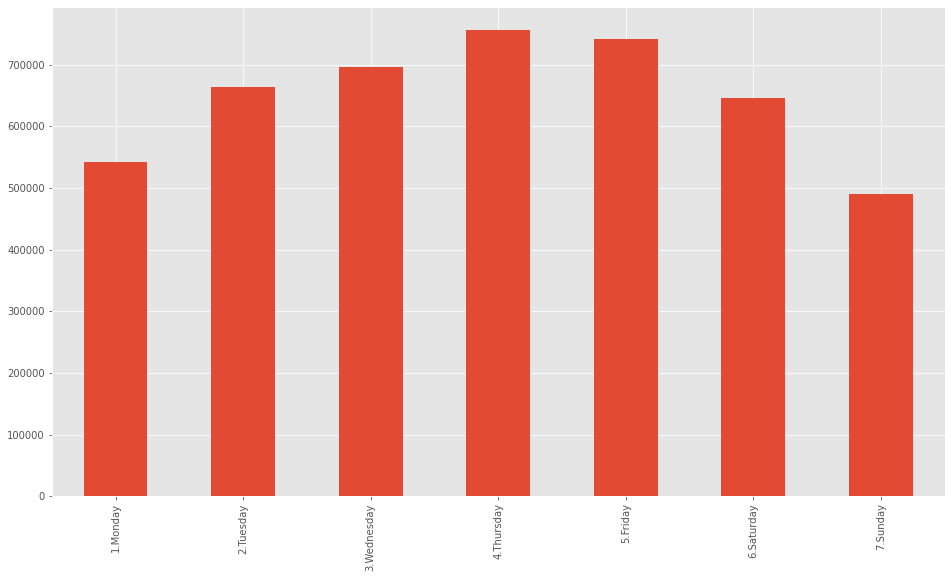

In [79]:
df["Weekday"].value_counts().sort_index().plot(kind = "bar")

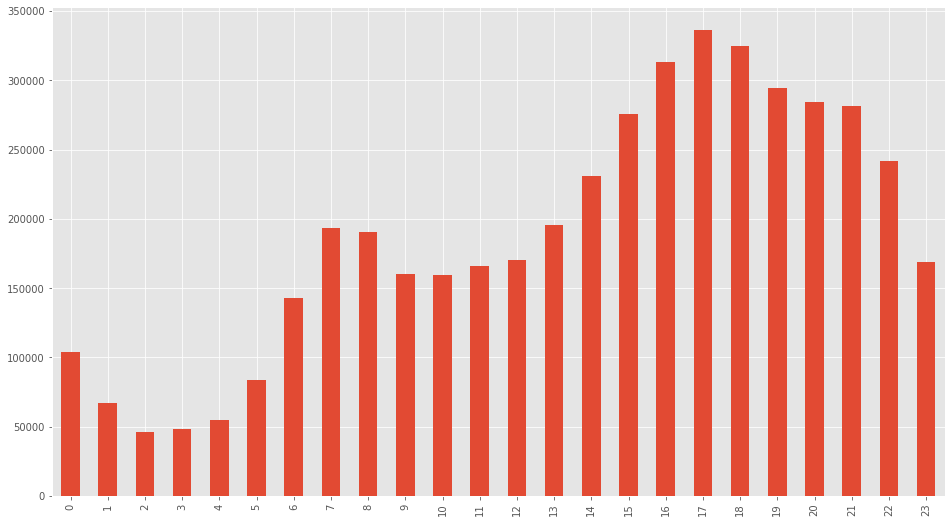

In [80]:
df["Hour"].value_counts().sort_index().plot(kind = "bar")

[EN]

First observation: We don't have enough data on months to asses the yearly trends on Uber rides. We can only see an increase on Uber rides from Spring to Fall.

Second observation: The busiest time is around 17:00 and the busiest days are Tuesday and Friday. We're going to make a heatmap to see what extra information we can obtain when crossing data.

[ES]

Primera observación: No tenemos suficientes datos sobre los meses para hacer un análisis de tendencias en viajes de Uber. Solo podemos ver un aumento en los viajes de Uber de primavera a otoño.

Segunda observación: La hora más concurrida es alrededor de las 17:00 y los días con más ocuppación son Jueves y Viernes. Vamos a usar un mapa de calor para ver que información adicional podemos obtener cuando cruzamos datos. 

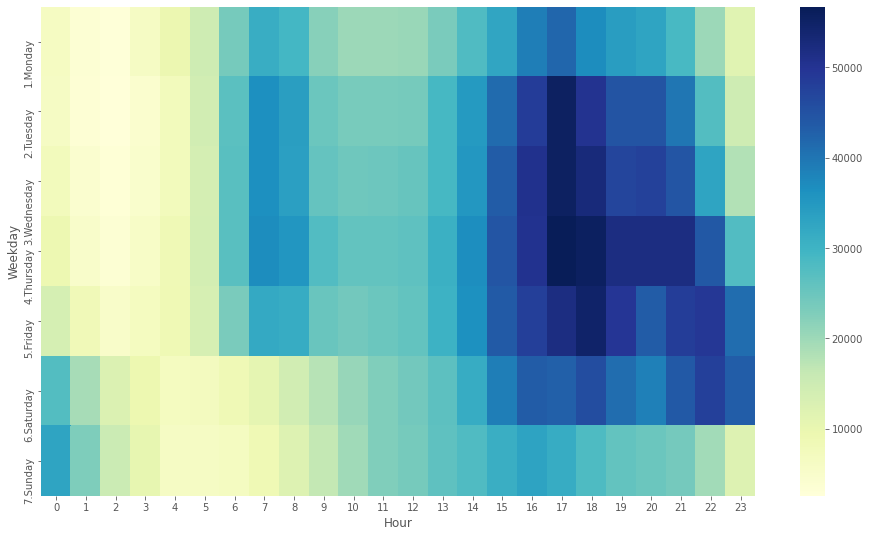

In [81]:
crossed = df.groupby(["Weekday", "Hour"]).size().reset_index(name="Count")
crossed = crossed.pivot("Weekday", "Hour", "Count")
sns.heatmap(crossed, cmap="YlGnBu")

[EN]

Third observation: There's a noticeable activity window from Tuesday to Saturday between 15:00 and 22:00. Likewise, this heatmap is of great value because show us a pattern that isn't that obvious in the bar charts. There's a second important window on Friday and Saturday, between 21:00 and 0:00, with a small continuation on Saturday and Sunday until 2:00. 

[ES]

Tercera observación: Hay una ventana de actividad notable de Martes a Sábado entre las 15:00 y las 22:00. Así mismo, este mapa de calor es de gran valor porque nos muestra un patrón que no es tan obvio en las gráficas de barra. Hay una segunda ventana importante en Viernes y Sábado, entre las 21:00 y 0:00, con una pequeña continaución en Sábado y Domingo hast las 2:00. 

[EN]

Second, we want to asses how busy are the Uber's bases.

[ES]

Segundo, queremos analizar que tan ocupadas están las bases de Uber. 

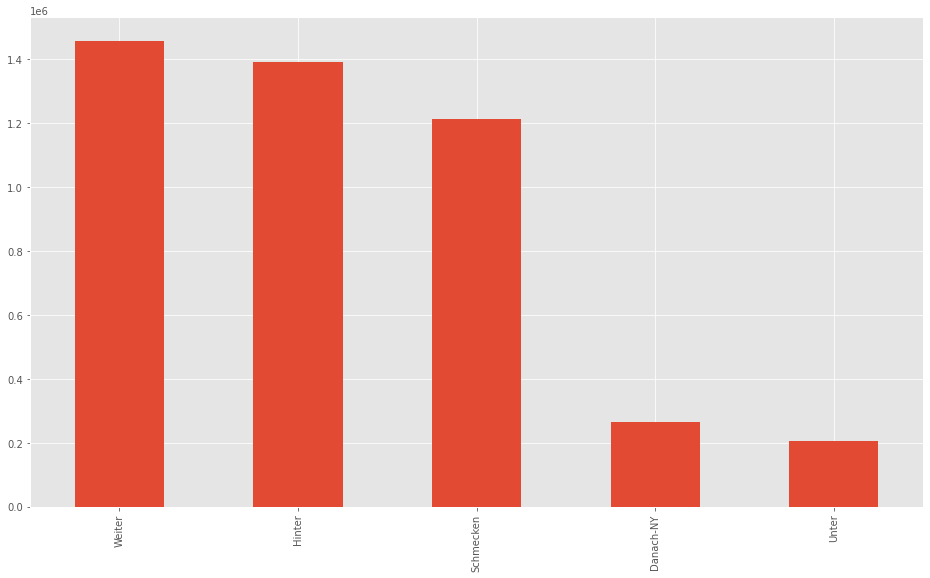

In [82]:
df["Base"].value_counts().plot(kind = "bar")

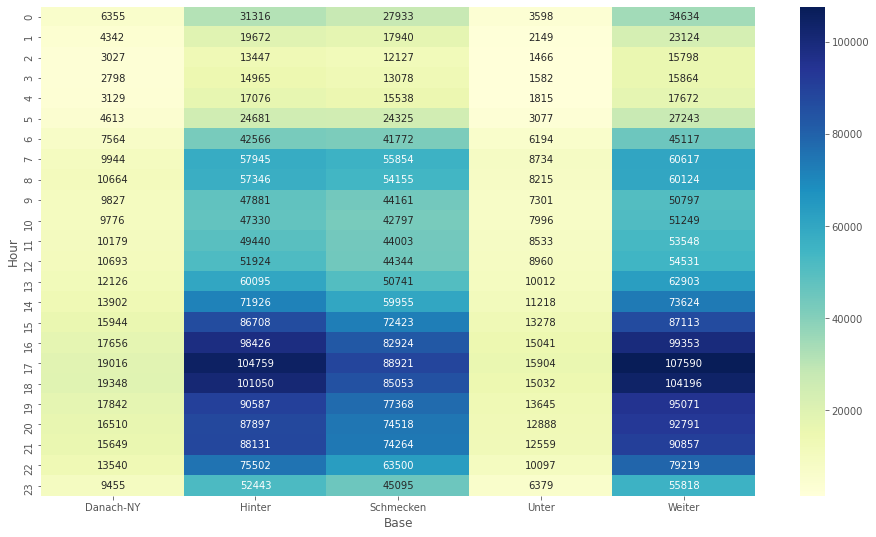

In [83]:
crossed2 = df.groupby(["Hour", "Base"]).size().reset_index(name="Count")
crossed2 = crossed2.pivot("Hour", "Base", "Count")
sns.heatmap(crossed2, annot=True, fmt="d", cmap="YlGnBu")

[EN]

We can see that Weiter, Hinter and Schmecken are the busiest bases. Likewise, that they share a similar pattern on how busy they are during the day -- with a special focus around 17:00. 

[ES]

Podemos ver que Weiter, Hinter y Schmecken son las bases más ocupadas. Así mismo, guardan un patrón similar sobre que tan ocupadas están durante el día. Especialmente alrededor de las 17:00. 

[EN]

Finally, we're going to see what the busiest areas in New York are for Uber rides.

[ES]

Finalmente, vamos a ver cuales son las areas más ocupadas en Nueva York para viajes en Uber. 

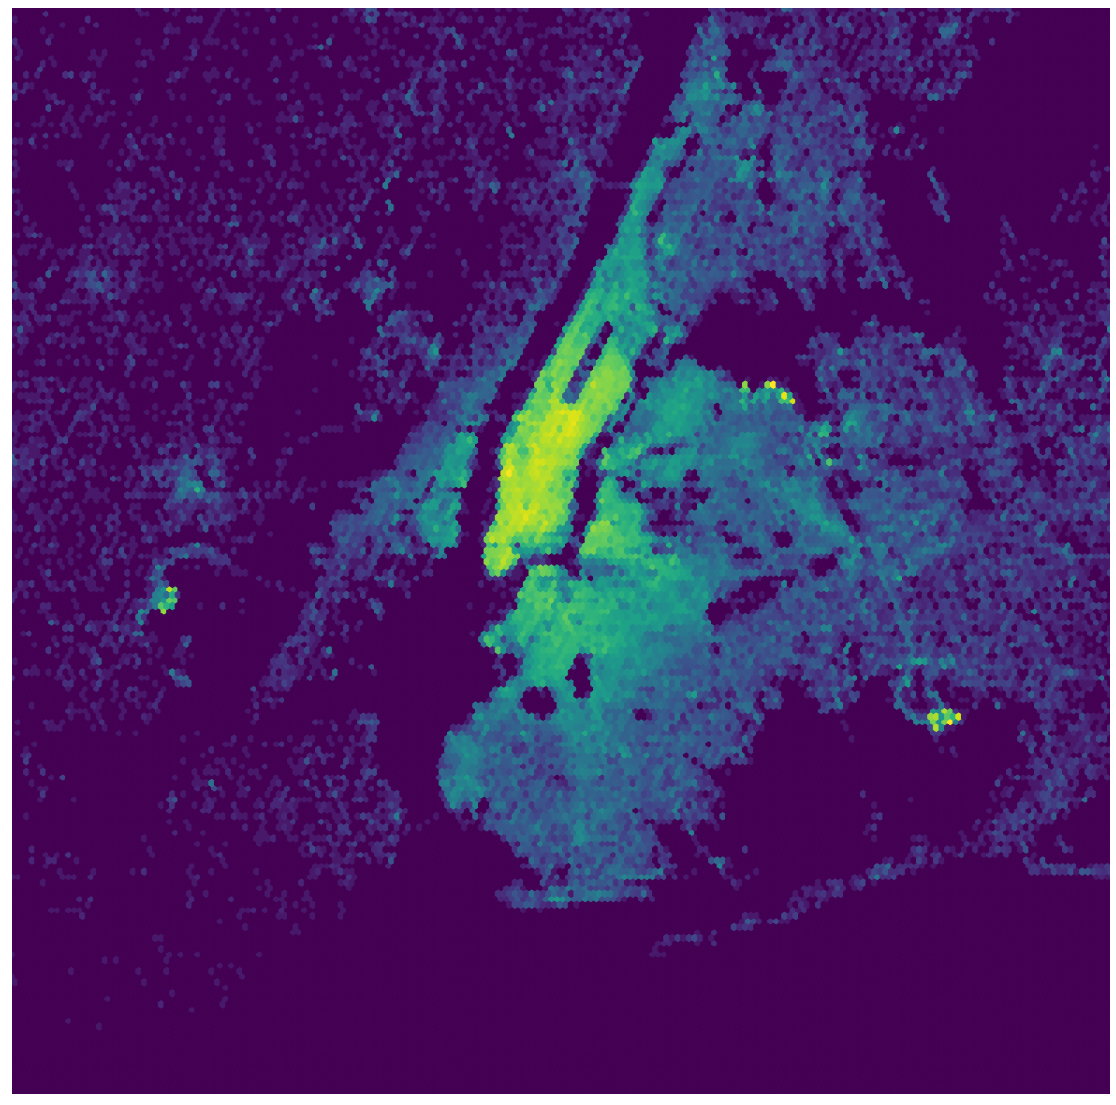

In [95]:
lat = df["Lat"] 
lon = df["Lon"]

west, south, east, north = -74.26, 40.50, -73.70, 40.92
fig = plt.figure(figsize=(28,20))
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north, llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(lon.values, lat.values)
m.hexbin(x, y, gridsize=1000, bins='log')

# Conclusion

[EN]

The answers to our initial questions are as follow:

1. There are two main patterns. First, Uber rides tend to be the busiest on weekdays around 17:00 -- which is the time when most people leave their offices. Second, another pattern show us quite some activities on Friday and Saturday nights, from 21:00 until 2:00.
2. Three out of five bases share most of the Uber Rides. The latter are the busiest from 13:00 to 0:00.
3. Manhattan is by far the part of New York where more rides are dispatched. Important activity is also present in Queens, Brooklyn and even neighoring New Jersey. Another interesting spot is JFK airport.

[ES]

Las respuestas a nuestras preguntas iniciales son las siguientes:

1. Hay dos patrones principales. Primero, los viajes en Uber tienden a tener mayor ocupación alrededor de las 17:00. Siendo este el tiempo en el que la mayoría de las personas dejan sus oficinas. Segundo, otro patrón nos muestra algo de actividad el Viernes y Sábado por la noche, entre las 21:00 y 2:00.
2. Tres de las cinco bases son las que tiene la mayoría de los viajes en Uber. Estas se encuentran más ocupadas entre las 13:00 y 0:00.
3. Manhattan es por mucho la parte de Nueva York en donde se mandan más viajes. Hay también actividad importante en Queens, Brookly e incluso la vecina Nueva Jersey. Otro punto interesante es el aeropuerto JFK. 